In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'ssd_update' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}

In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
#For downloading files which uses HTTP, HTP, FTP protocols 
!pip install wget

In [ ]:
import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
# IF THE ABOVE CELL DOESN'T CLONES THE REPO, THEN MANULLAY GO TO FOLDER AND COLNE IT
os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
!pip install pycocotools-windows

In [ ]:
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win32.zip"
wget.download(url)
!move protoc-3.15.6-win32.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win32.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e . 

In [ ]:
%cd Tensorflow/models/research

In [ ]:
%cd PythonAPI

In [ ]:
%cd ../../..

In [ ]:
!pip install cython
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

In [ ]:
!copy object_detection/packages/tf2/setup.py .
!python -m pip install --use-feature=2020-resolver .

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [ ]:
!pip install tensorflow-addons

In [ ]:
!pip install absl-py

In [ ]:
pip show tensorflow-object-detection-api

In [ ]:
!pip install tensorflow-object-detection-api

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf==3.9.2 matplotlib

In [ ]:
!pip install cPython --upgrade

In [ ]:
import object_detection

In [ ]:
!pip list

In [ ]:
pip show tensorflow

In [ ]:
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

In [5]:
labels = [{'name':'Mobile-phone', 'id':1}, {'name': 'Watch', 'id': 2}]
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
#Converting the annotations into images script
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
!pip install pandas

In [60]:
 !python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'valid')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

Traceback (most recent call last):
  File "E:\Tensorflow Object Detection 3\TFODCourse\Tensorflow\scripts\generate_tfrecord.py", line 195, in <module>
    tf.app.run()
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\platform\app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\absl\app.py", line 308, in run
    _run_main(main, args)
  File "C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\absl\app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "E:\Tensorflow Object Detection 3\TFODCourse\Tensorflow\scripts\generate_tfrecord.py", line 182, in main
    examples = xml_to_csv(args.xml_dir)
  File "E:\Tensorflow Object Detection 3\TFODCourse\Tensorflow\scripts\generate_tfrecord.py", line 95, in xml_to_csv
    raise ValueError('TF Record cannot be generated since non-electronic class - {} f

In [11]:
 !python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'final_test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [ ]:
!pip install pytz

In [ ]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['MODEL_PATH'], CUSTOM_MODEL_NAME )}

In [6]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [7]:
#storing the pipeline config file (XML configuration where we have to set the paths)
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

In [ ]:
#Reading the file using tensorflow's input/output operations
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
#Setting up the configuration file
#Setting the number of lables 
pipeline_config.model.ssd.num_classes = len(labels)
#Setting the size of batch i.e., number of objects to be trained
pipeline_config.train_config.batch_size = 5
#Setting up the model path that has been downloaded from tensorflow model zoo (ssd_mobilenet in out case)
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
#Setting the type of operation we want to perform
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
#Setting the path for label_map.pbtxt ie., the file that contains the labels array which contains the name and id of objects to be trained
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
#Setting the path for training data present in train.record file
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
#Setting the path for label_map.pbtxt ie., the file that contains the labels array which contains the name and id of objects to be trained
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
#Setting the path for testing data present in test.record file
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [26]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
#To train the model, below is the python script
#When this script is run, then in our models folder i.e., the model that we use for training folder we'll get a folder named 'train'
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

In [27]:
#To check precession and recall for our trained model
#Once this command is executed in cmd then a folder named 'eval' will be created in the model folder 
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [32]:
command

'python Tensorflow\\models\\research\\object_detection\\model_main_tf2.py --model_dir=Tensorflow\\workspace\\models\\ssd_update --pipeline_config_path=Tensorflow\\workspace\\models\\ssd_update\\pipeline.config --checkpoint_dir=Tensorflow\\workspace\\models\\ssd_update'

In [ ]:
'''We can check precision, recall and loss metrics by traversing to the folders that we got created by 
Running the above two commands and use the command ->>   tensorboard --logdir=<TRAIN/EVAL FOLDER PATH>
and check the metrics by going to the url provided there once command is run.'''

In [7]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [8]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-121')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [15]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [11]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'check', 'gilles-de-muynck-gJ9b48mc5qs-unsplash.jpg')

In [32]:
FOLDER_PATH = os.path.join(paths['IMAGE_PATH'], 'check') 
IMAGES = os.listdir(FOLDER_PATH)
IMAGES_PATH = os.path.join(paths['IMAGE_PATH'], 'check', IMAGES[random.randint(0, len(IMAGES)-1)])
IMAGES_PATH

'Tensorflow\\workspace\\images\\check\\3c57379999586d77_jpg.rf.5696c4d2b05c04be3abf7cecf1998ab7.jpg'

In [12]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\check\\gilles-de-muynck-gJ9b48mc5qs-unsplash.jpg'

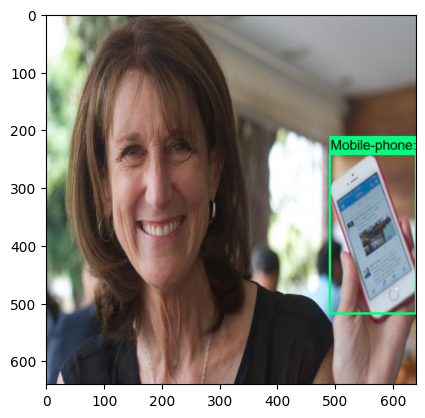

In [33]:
img = cv2.imread(IMAGES_PATH)
img_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(img_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = img_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
cap = cv2.VideoCapture(0)
width = int(cv2.CAP_PROP_FRAME_WIDTH)
height = int(cv2.CAP_PROP_FRAME_HEIGHT)

while True:
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.4,
                agnostic_mode=False)

    
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (640,480)))
    
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
!pip uninstall opencv-contrib-python